In [1]:
# ML Models- decision tree, random forest, XGBoost

In [2]:
pip install graphviz

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
from pandas import to_datetime
import itertools
import warnings
import datetime
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

sns.set(rc={'figure.figsize':(20,10)})
#my_data = Path("C:\Users\victo\OneDrive\Documents\Python Scripts\water_potability.csv")
my_data = "C:\\Users\\victo\\OneDrive\\Documents\\Python Scripts\\water_potability.csv"
df=pd.read_csv(my_data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
# New dataset without missing values
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [9]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [10]:
df.value_counts()

ph         Hardness    Solids       Chloramines  Sulfate     Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability
0.227499   152.530111  39028.59934  3.462492     283.693782  443.029232    13.201943       62.322711        3.545741   1             1
7.702183   192.137531  18126.03096  9.154581     364.191227  646.732599    14.376337       90.527536        4.382159   1             1
7.726135   233.947864  21667.86874  6.313182     340.273171  472.258994    14.399860       36.578038        3.720637   0             1
7.725333   252.265491  36477.73811  8.386761     426.543590  339.411327    17.485844       60.483885        3.724837   0             1
7.721078   208.438593  17248.61874  7.685370     286.403522  269.013635    11.757348       56.884528        3.223951   1             1
                                                                                                                                    ..
6.444555   166.635180  24855.83004  9.492361     287.412380 

In [11]:
df.describe

<bound method NDFrame.describe of              ph    Hardness       Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.41744     8.059332  356.886136   
4      9.092223  181.101509  17978.98634     6.546600  310.135738   
5      5.584087  188.313324  28748.68774     7.544869  326.678363   
6     10.223862  248.071735  28749.71654     7.513408  393.663395   
7      8.635849  203.361523  13672.09176     4.563009  303.309771   
...         ...         ...          ...          ...         ...   
3267   8.989900  215.047358  15921.41202     6.297312  312.931021   
3268   6.702547  207.321086  17246.92035     7.708117  304.510230   
3269  11.491011   94.812545  37188.82602     9.263166  258.930600   
3270   6.069616  186.659040  26138.78019     7.747547  345.700257   
3271   4.668102  193.681736  47580.99160     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436525       100.341674   4.6287

C:\Users\victo\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\victo\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\victo\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\victo\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is depr

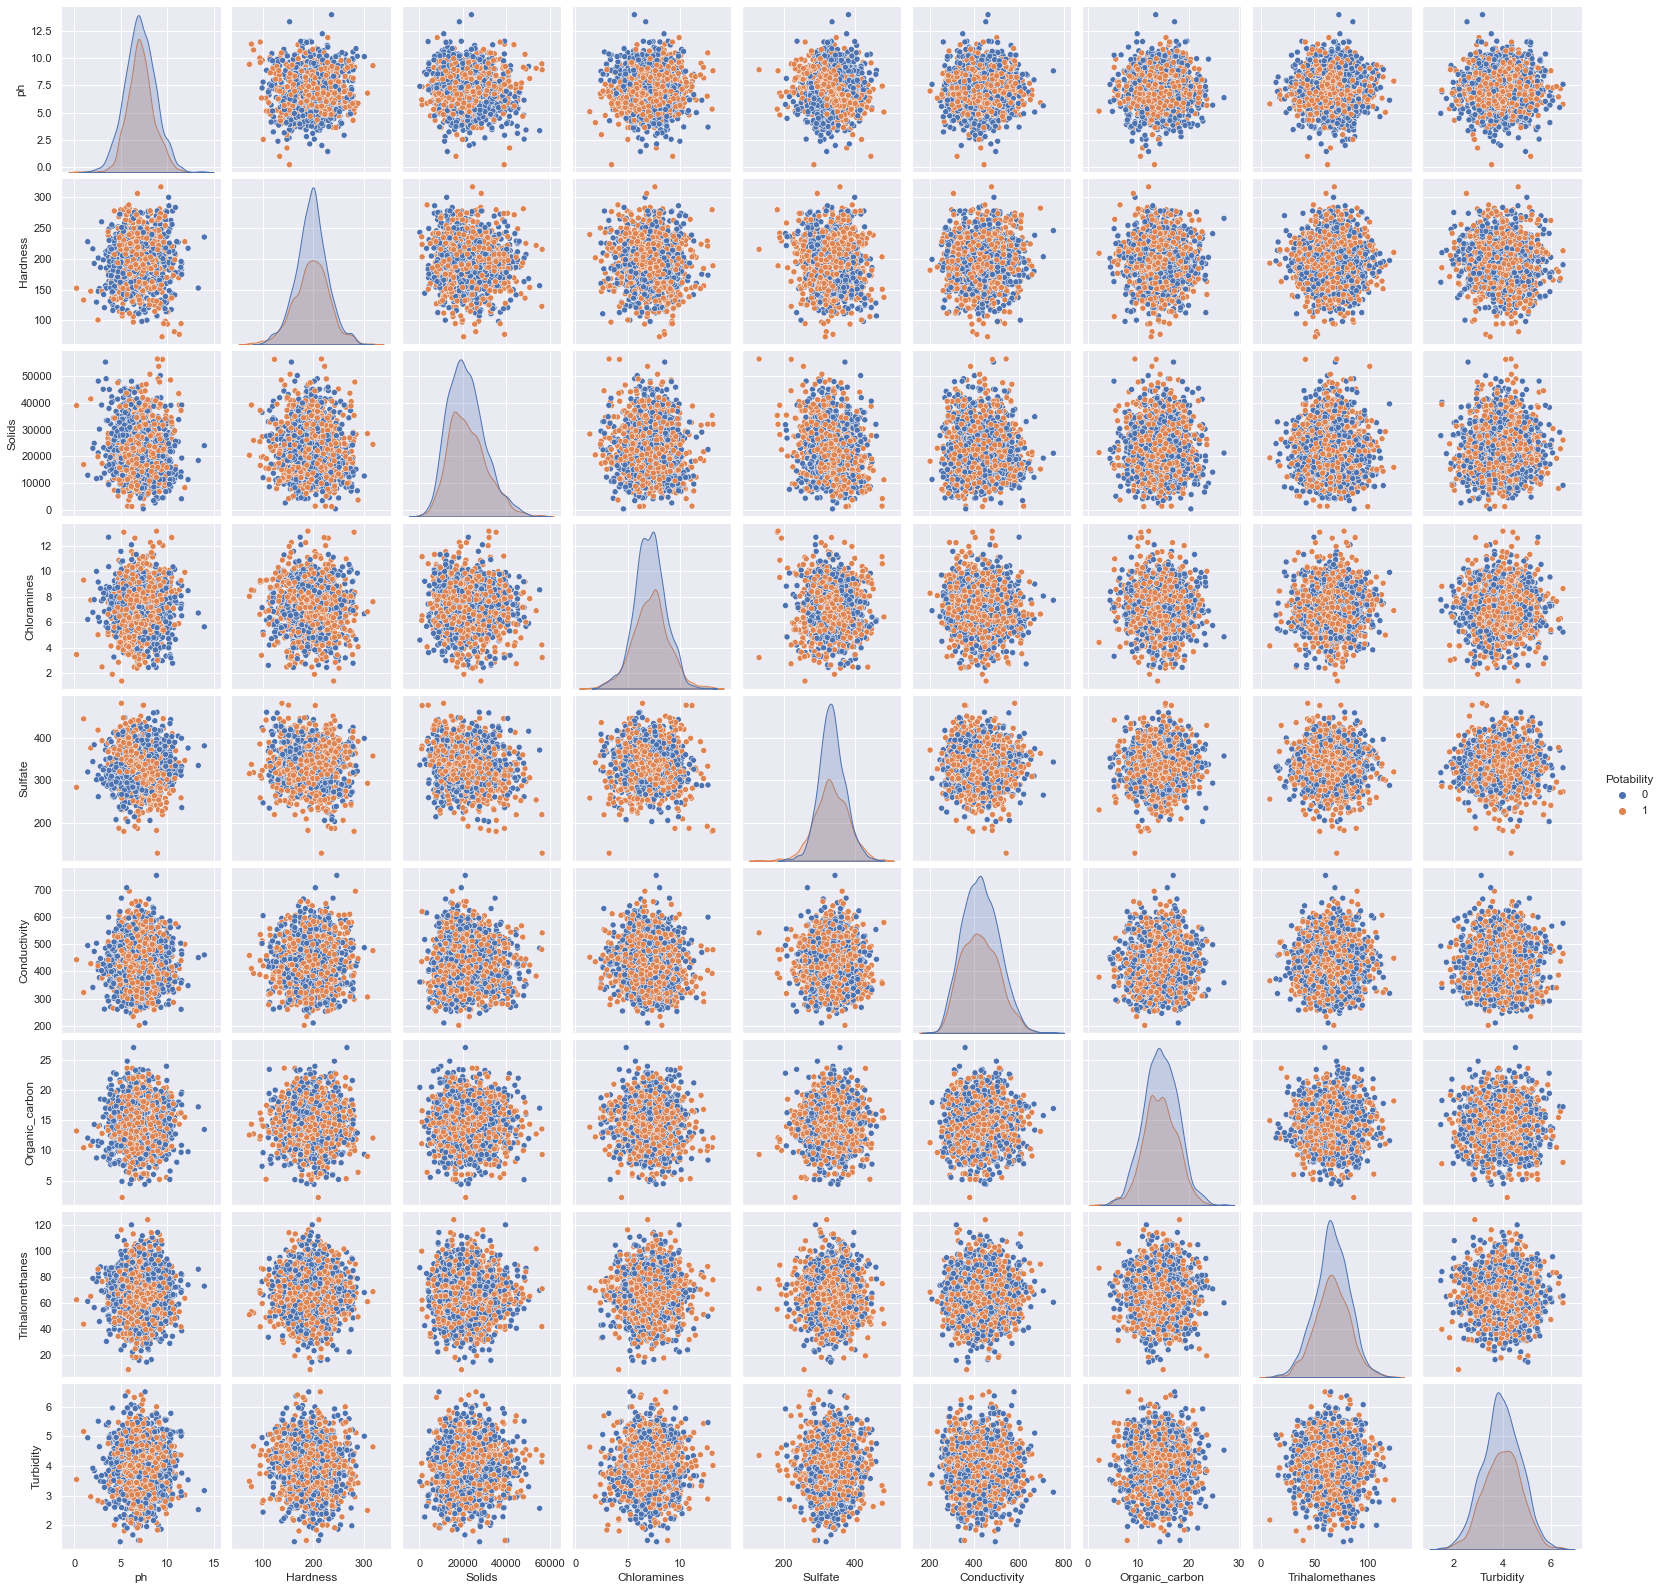

In [12]:
# Visualize the data using seaborn Pairplots
g = sns.pairplot(df, hue = 'Potability', diag_kws={'bw': 0.2})

C:\Users\victo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


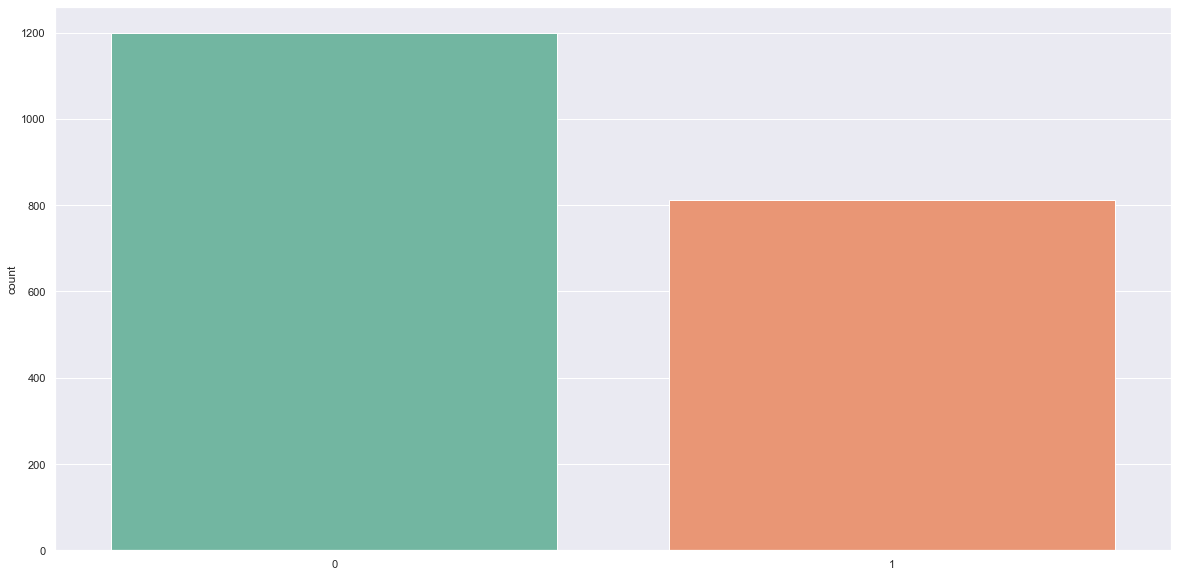

In [13]:
# Checking for the distribution to see if it is balanced
x = df['Potability'].values

sns.countplot(x, palette = "Set2"); #countplot is for binary, distplot is for continous

In [14]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


In [15]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [16]:
# Scaling our columns

scale_vars = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars])
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115,0
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358,0
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973,0
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428,0
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049,0


In [17]:
# Splitting the data into X and y
X = df.drop('Potability', axis=1).values # Input features (attributes)
y = df['Potability'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=0)

X shape: (2011, 9)
y shape: (2011,)


In [18]:
# Balance my y variable that was out of balance

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 1200), (1, 1200)]


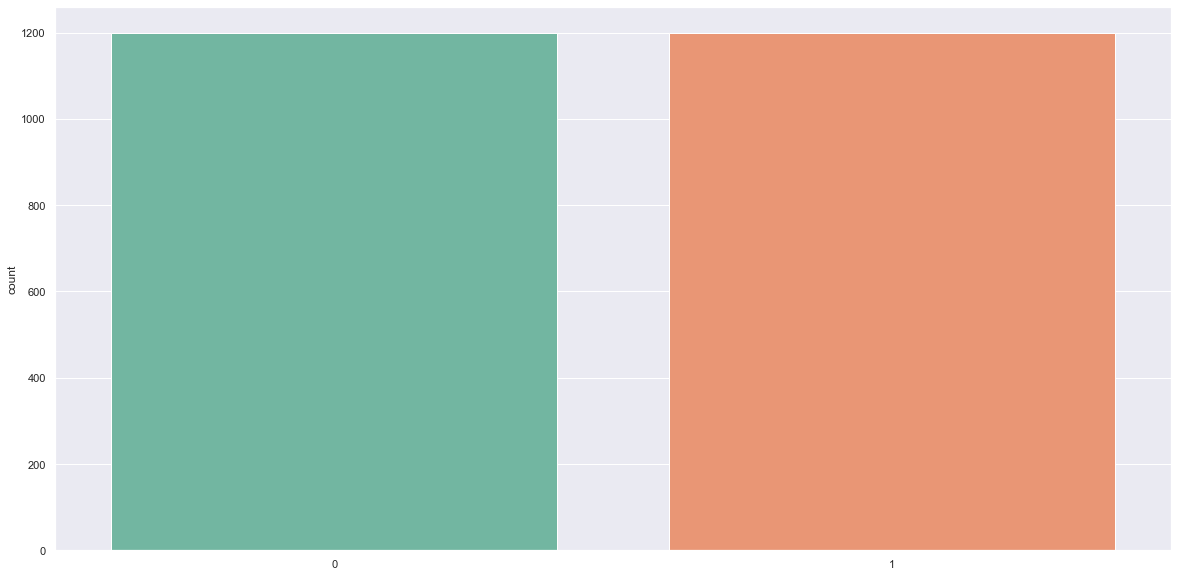

In [19]:
# Checking to see if it is balanced

ax = sns.countplot(x = y, palette = "Set2")

In [20]:
# Running a decision tree model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
dt.fit(X_train, y_train)

# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [21]:
# Graphing the decision tree

import graphviz 

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=df.drop('Potability', axis=1).columns,    
    class_names=df['Potability'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [22]:
# Finding the feature importance

for i, column in enumerate(df.drop('Potability', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature ph:, 0.374
Importance of feature Hardness:, 0.113
Importance of feature Solids:, 0.080
Importance of feature Chloramines:, 0.000
Importance of feature Sulfate:, 0.363
Importance of feature Conductivity:, 0.070
Importance of feature Organic_carbon:, 0.000
Importance of feature Trihalomethanes:, 0.000
Importance of feature Turbidity:, 0.000


,index,Variable,Feature Importance Score
0,0,ph,0.373974
1,4,Sulfate,0.363476
2,1,Hardness,0.112613
3,2,Solids,0.079756
4,5,Conductivity,0.070182
5,3,Chloramines,0.000000
6,6,Organic_carbon,0.000000
7,7,Trihalomethanes,0.000000
8,8,Turbidity,0.000000


In [23]:
# Finding the accuracy on training set
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Finding the accuracy on test set
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.6488983653162758
Testing Accuracy is:  0.6456953642384106


In [24]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

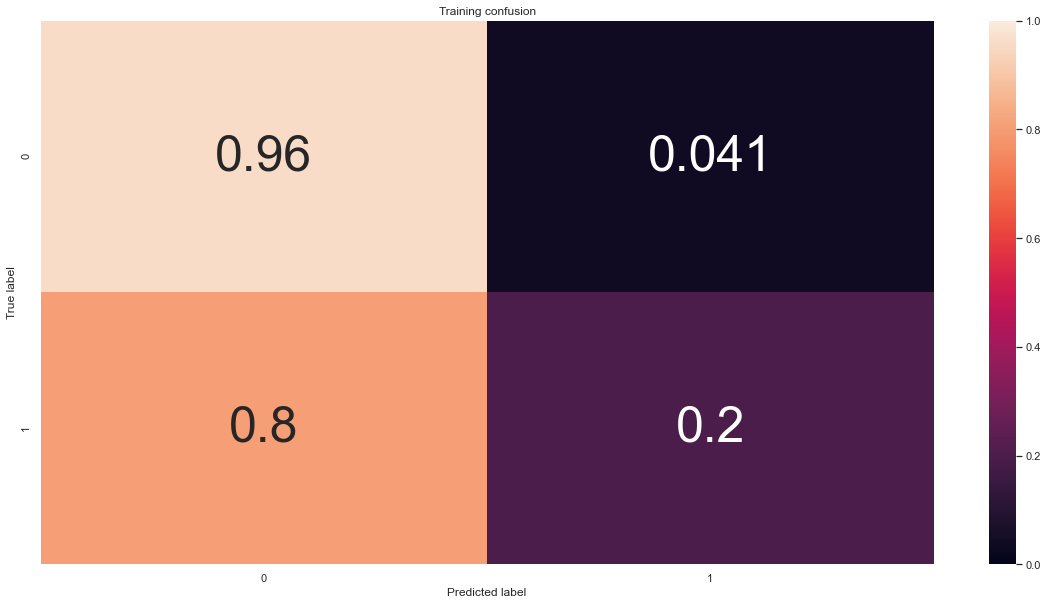

In [25]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [26]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[799,  34],
       [460, 114]], dtype=int64)

In [27]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")


##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

# Explanations:https://youtu.be/0HDy6n3UD5M

The True Positive rate / Recall per class is:  [0.95918367 0.19860627]
The Precision per class is:  [0.63463066 0.77027027]
The False Alarm rate per class is:  [0.80139373 0.04081633]
The Miss Rate rate per class is:  [0.04081633 0.80139373]
The Classification error of each class is [0.35110163 0.35110163]
The Accuracy of each class is [0.64889837 0.64889837]

The average Recall is:  0.5788949726231956
The average Precision is:  0.702450464761823
The average False Alarm is:  0.4211050273768044
The average Miss Rate rate is:  0.4211050273768044
The average Classification error is 0.35110163468372424
The average Accuracy is 0.6488983653162758


Training Accuracy is:  0.9992892679459844
Testing Accuracy is:  0.7052980132450332


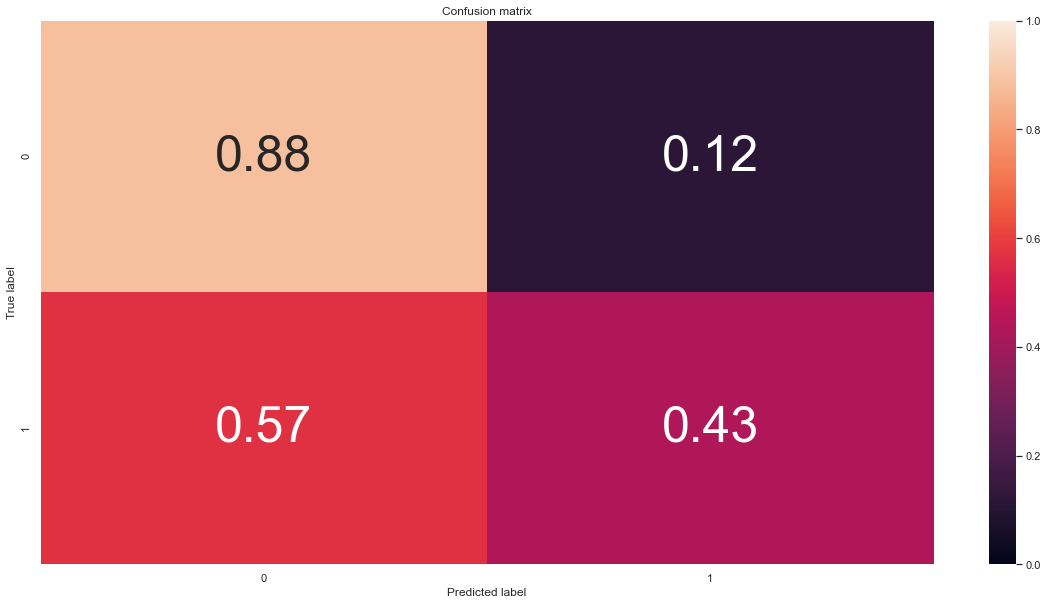

In [28]:
# Running random forest

rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.682
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.616
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.621
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.626
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.636
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.710
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.619
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.637
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.647
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.664
Classification accuracy on test set with max features = log2 and max_depth = None: 0.710
Classification accuracy on test set with max features = log2

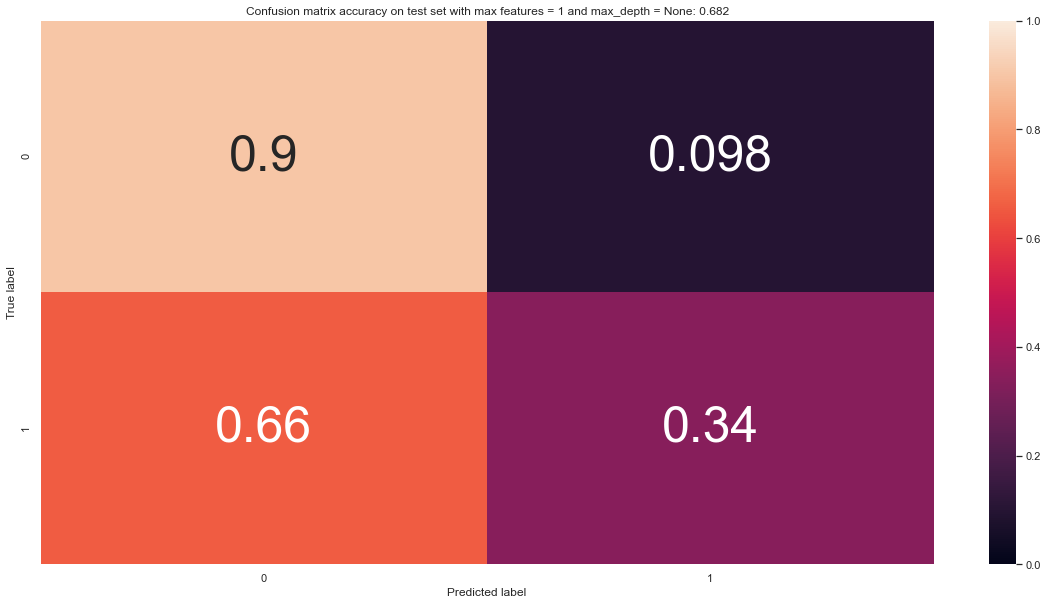

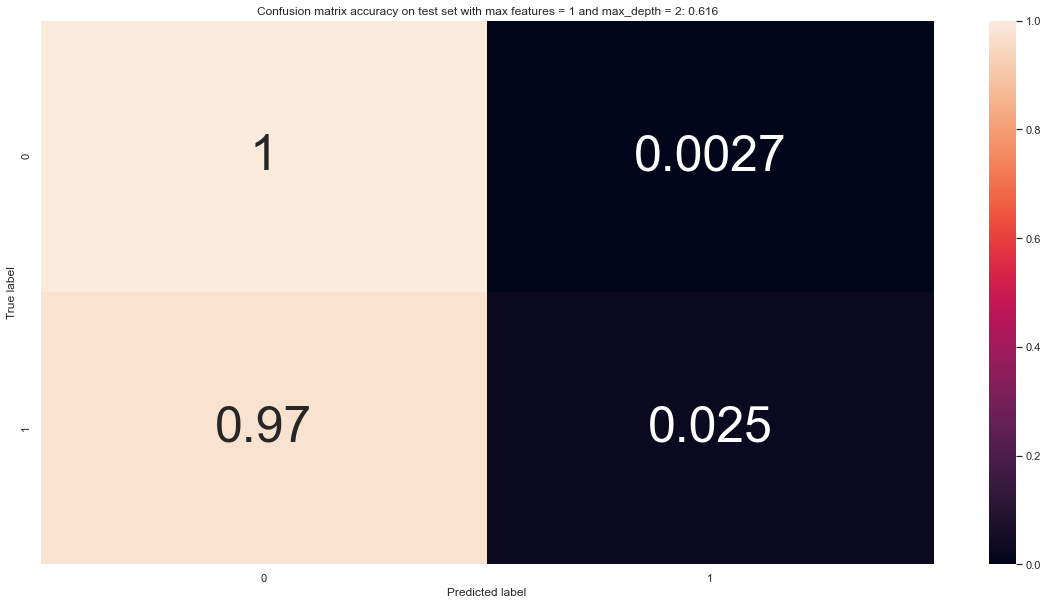

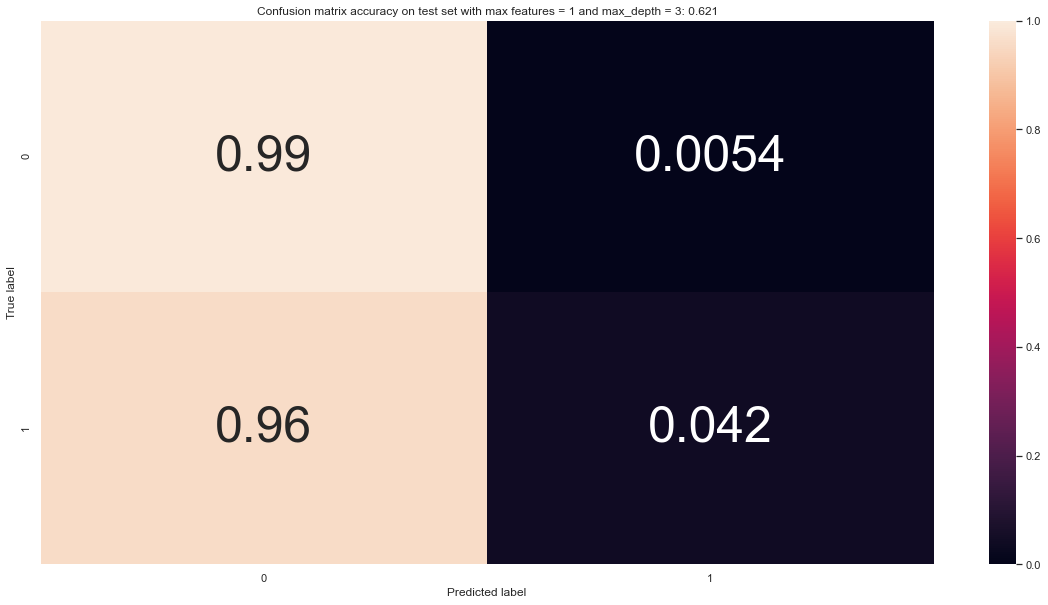

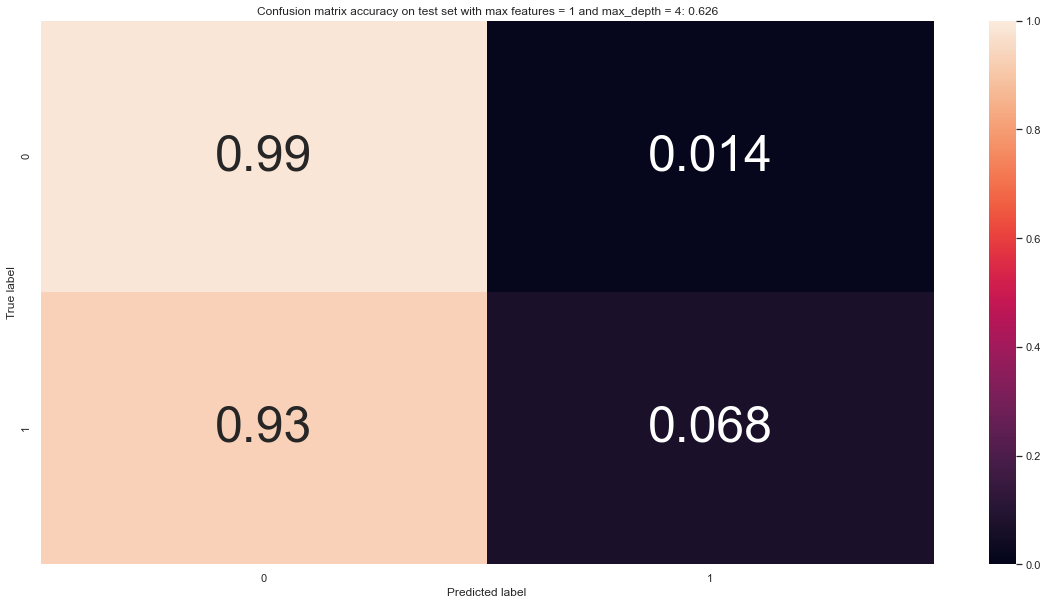

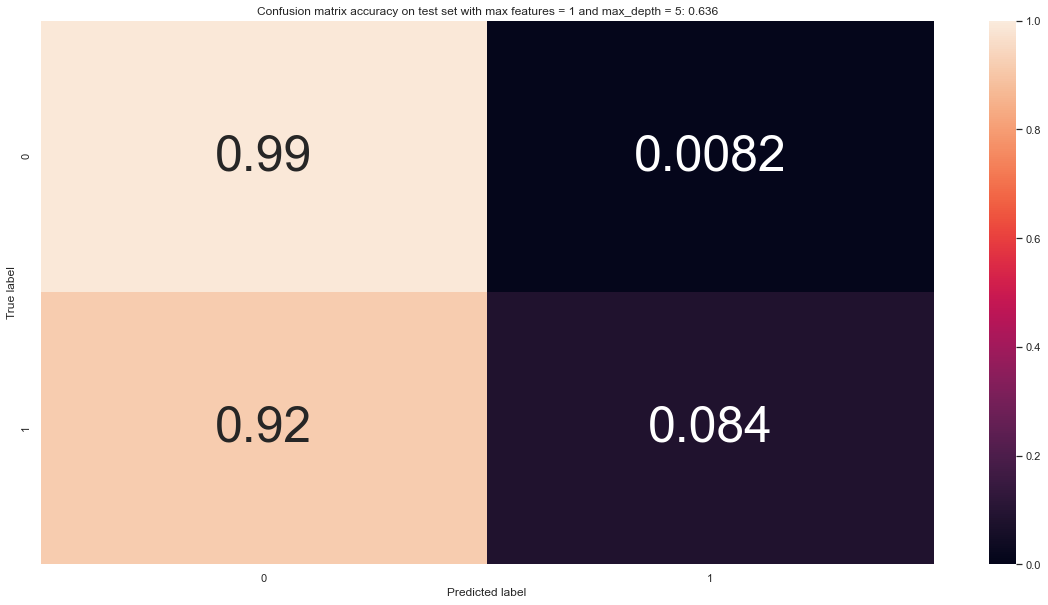

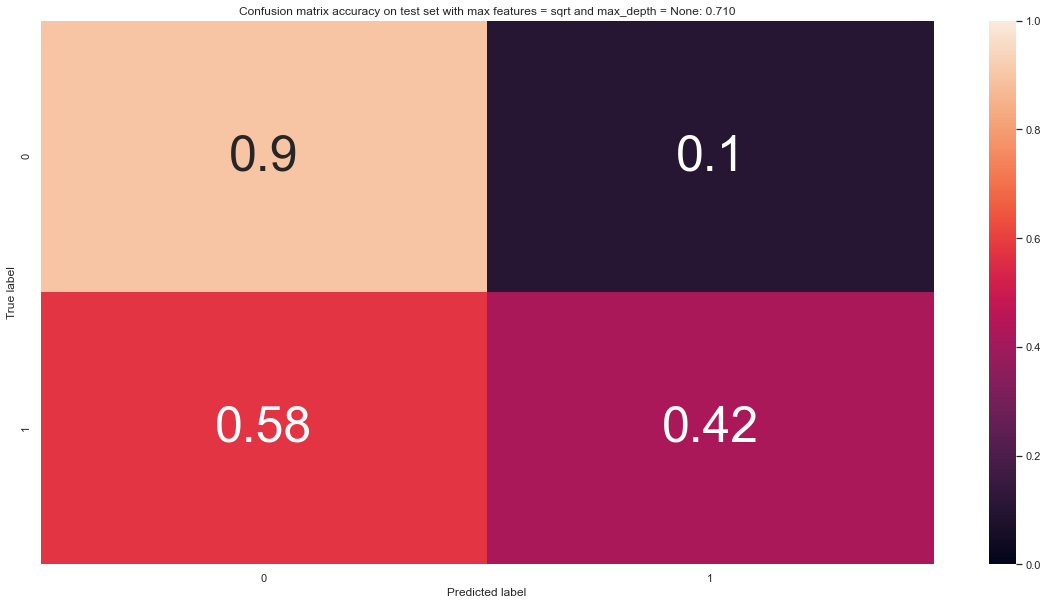

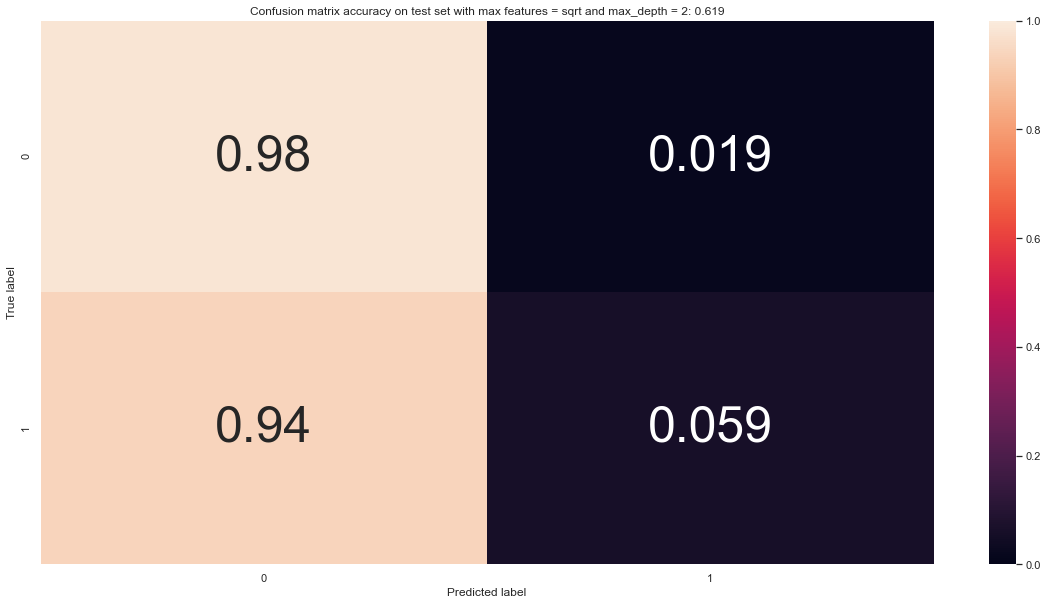

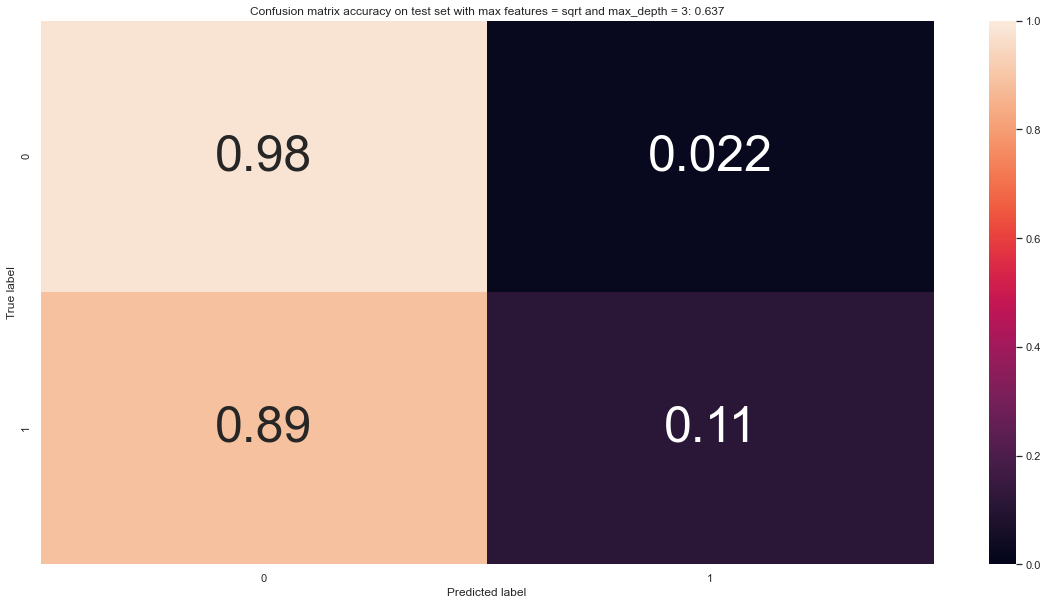

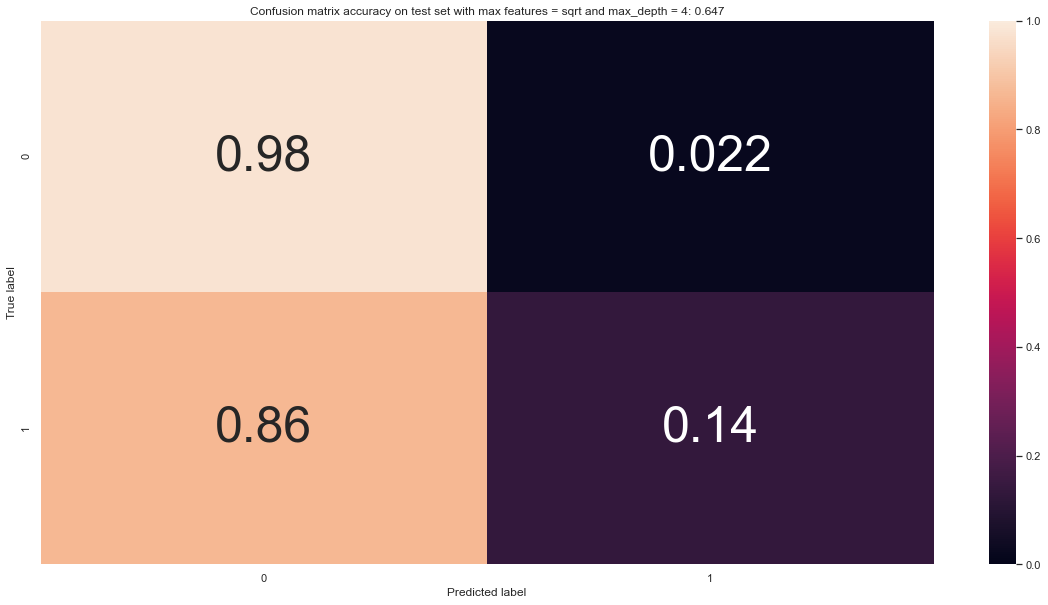

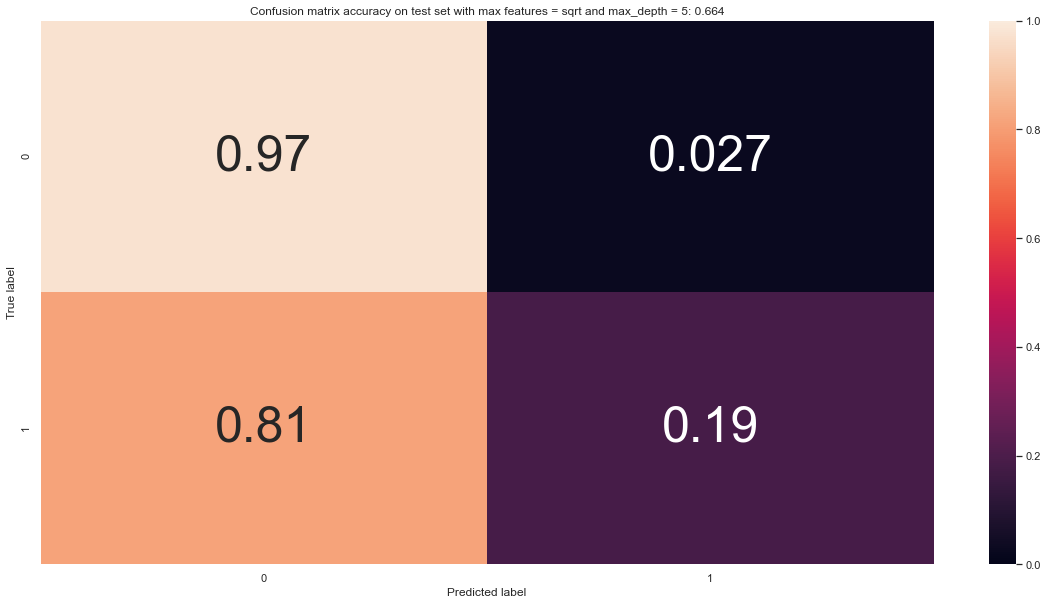

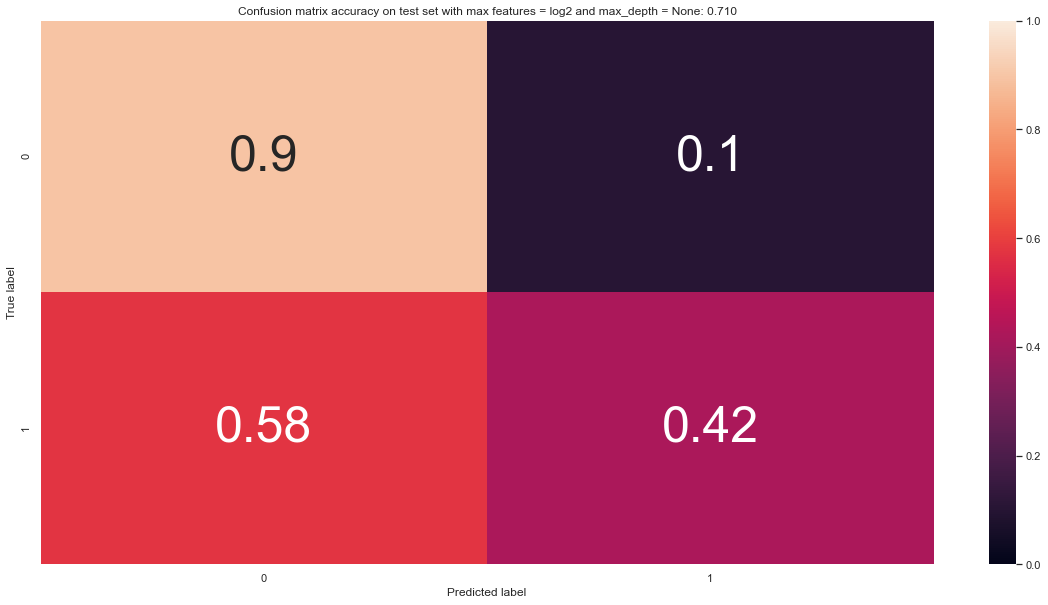

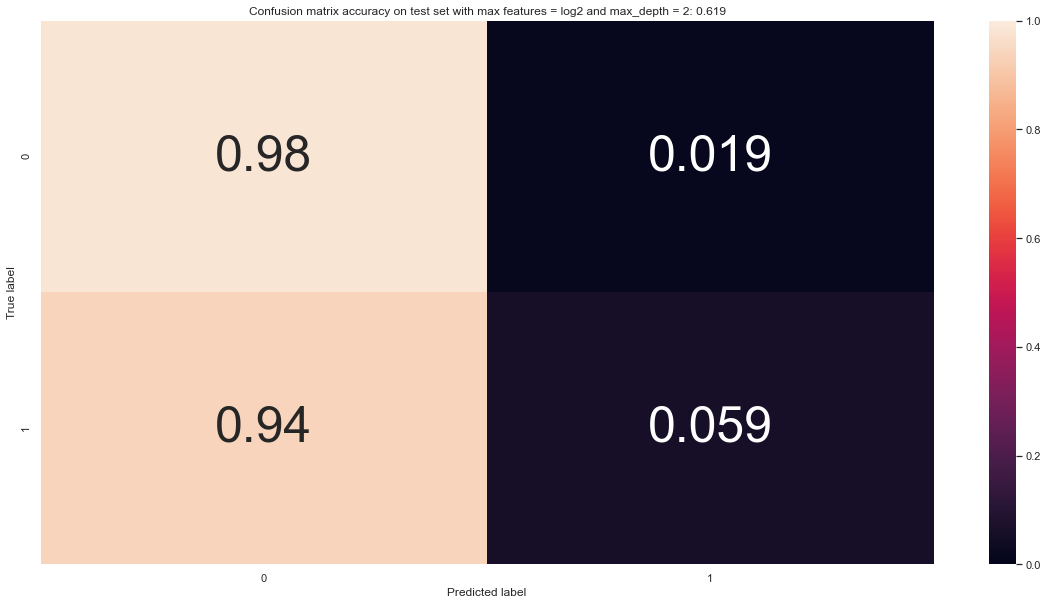

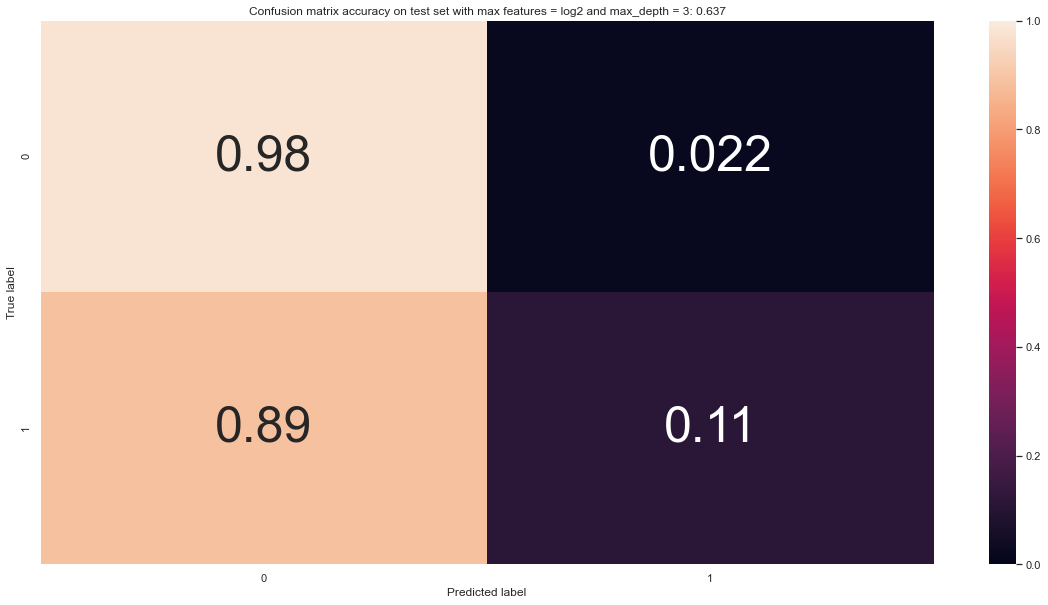

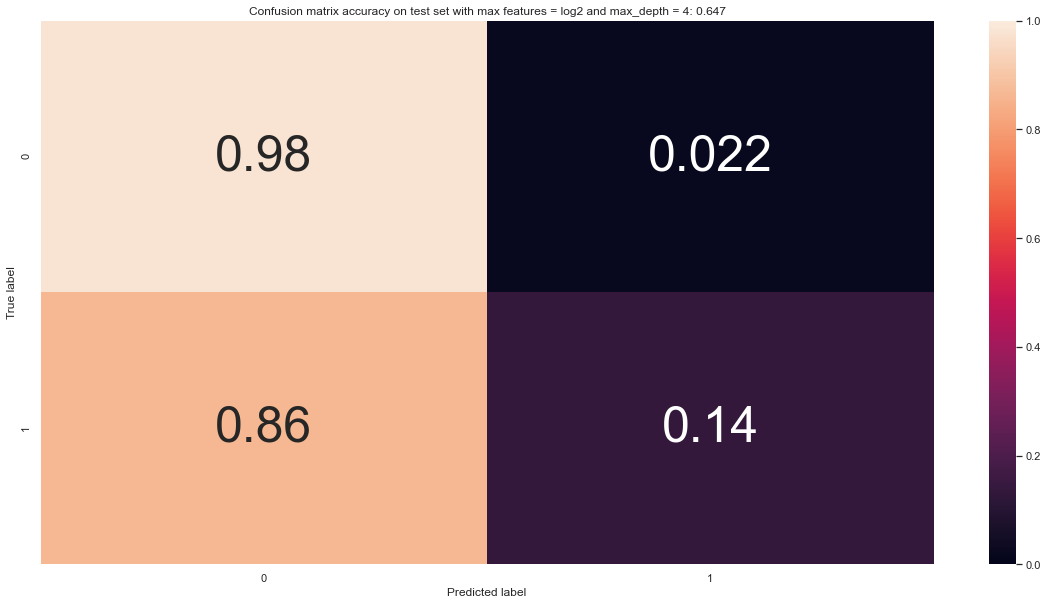

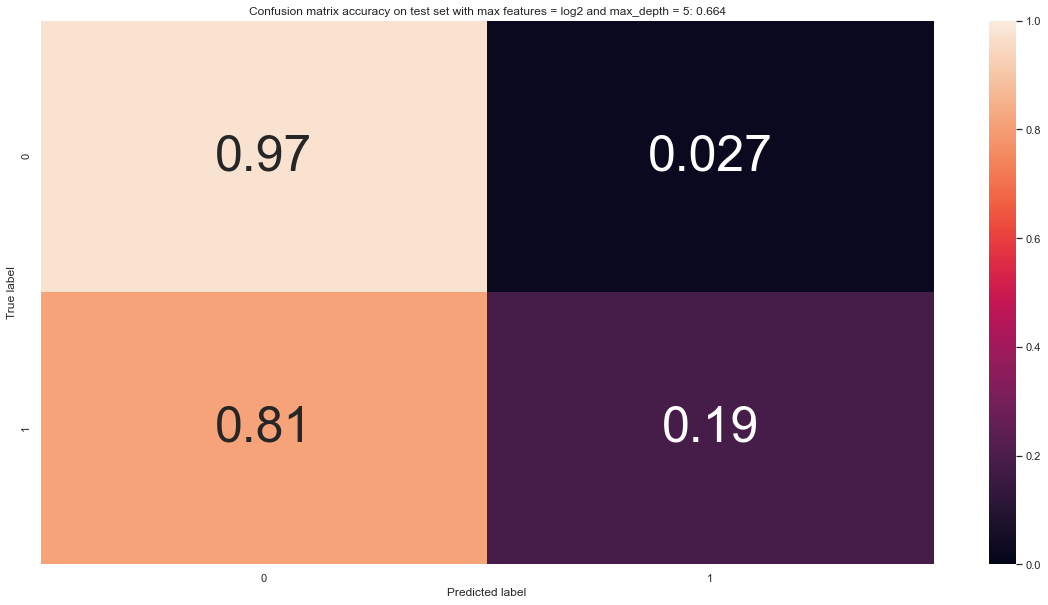

In [29]:
# Tuning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [30]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")


##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)


The True Positive rate / Recall per class is:  [0.97275204 0.18565401]
The Precision per class is:  [0.64909091 0.81481481]
The False Alarm rate per class is:  [0.81434599 0.02724796]
The Miss Rate rate per class is:  [0.02724796 0.81434599]
The Classification error of each class is [0.33609272 0.33609272]
The Accuracy of each class is [0.66390728 0.66390728]

The average Recall is:  0.5792030260177744
The average Precision is:  0.7319528619528619
The average False Alarm is:  0.4207969739822256
The average Miss Rate rate is:  0.4207969739822256
The average Classification error is 0.3360927152317881
The average Accuracy is 0.6639072847682119


In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[12:47:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.0s
[12:47:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.0s
[12:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.0s
[12:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.0s
[12:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.0s
[12:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[12:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[12:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[12:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[12:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=7; total time=   0.0s
[12:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.0s
[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.0s


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.0s
[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.0s


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.0s
[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=3; total time=   0.0s
[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=3; total time=   0.0s
[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=3; total time=   0.0s
[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=3; total time=   0.0s
[12:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=3; total time=   0.0s
[12:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.1s
[12:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.1s
[12:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.1s
[12:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.1s
[12:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.1s
[12:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [33]:
# Accuracy on Test
print("Training Accuracy is: ", clf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", clf.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  1.0


In [34]:
# Going through all the interations above to select the best parameters
clf.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [35]:
# Getting the model with the best parameters...so, this is our model
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

[12:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\victo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


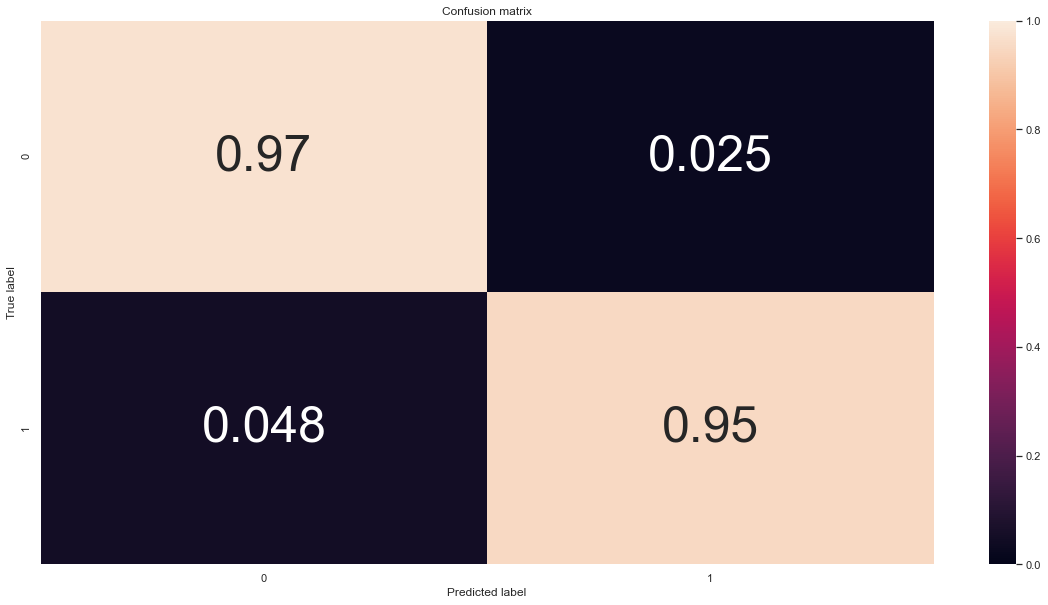

In [36]:
# Here's our final model, and we use this to predict new data

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

In [37]:
## Our XGBoost has the best model according to the scores in the cm

In [38]:
# Importing new data to try and predict with our model
my_data = "C:\\Users\\victo\\OneDrive\\Documents\\Python Scripts\\water_potability_copy.csv"
df=pd.read_csv(my_data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.371085,184.385124,18203.73003,7.174135,129.422921,346.768052,14.951295,79.850929,3.257744
1,11.180695,240.887144,21366.28360,7.657991,224.236259,324.341893,9.147436,50.577979,3.635635
2,6.506488,186.670496,15797.03040,8.322987,214.373394,328.209566,13.986735,57.729724,3.067627
3,6.643936,153.569738,32033.33202,5.934279,181.101509,333.084455,18.284807,69.509220,3.813429
4,5.033774,169.578526,18088.35485,9.802721,188.313324,318.354612,12.488007,54.299444,3.241972


In [39]:
df.isna().sum()

ph                 24
Hardness           11
Solids             10
Chloramines        21
Sulfate            15
Conductivity       30
Organic_carbon     12
Trihalomethanes    19
Turbidity           0
dtype: int64

In [40]:
df.shape

(115, 9)

In [41]:
df1=df.dropna()

In [42]:
df1.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [43]:
df1.shape

(61, 9)

In [44]:
df1.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [45]:
# Let's scale our columns
scale_vars = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
scaler = MinMaxScaler()
df1[scale_vars] = scaler.fit_transform(df1[scale_vars])
df1.head()

<ipython-input-45-9ea3da0ff2af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[scale_vars] = scaler.fit_transform(df1[scale_vars])
C:\Users\victo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\victo\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.489390,0.463447,0.317210,0.460061,0.069830,0.578810,0.419862,0.644644,0.392069
1,1.000000,0.756103,0.392375,0.523354,0.574326,0.452150,0.029179,0.307872,0.486008
2,0.373507,0.475284,0.260009,0.610342,0.521847,0.473994,0.354933,0.390150,0.344808
3,0.391929,0.303837,0.645902,0.297875,0.344809,0.501527,0.644255,0.525667,0.530205
4,0.176116,0.386755,0.314467,0.803906,0.383182,0.418334,0.254047,0.350686,0.388149


In [46]:
# Making predictions now based on the xgboost model

pred_xgboost = final_model.predict(df1.values)
pred_xgboost

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [47]:
# What are the probabilities for each prediction
pred_prob_xgboost = final_model.predict_proba(df1.values)
pred_prob_xgboost

array([[0.37673706, 0.62326294],
       [0.61002374, 0.38997623],
       [0.6748787 , 0.32512128],
       [0.11432743, 0.88567257],
       [0.78216183, 0.21783818],
       [0.613078  , 0.386922  ],
       [0.5606549 , 0.43934512],
       [0.64463985, 0.35536018],
       [0.52584094, 0.47415906],
       [0.2936923 , 0.7063077 ],
       [0.695559  , 0.304441  ],
       [0.5897115 , 0.4102885 ],
       [0.73263645, 0.26736352],
       [0.3914011 , 0.6085989 ],
       [0.7339437 , 0.26605627],
       [0.7245335 , 0.2754665 ],
       [0.5291729 , 0.4708271 ],
       [0.41302162, 0.5869784 ],
       [0.19885778, 0.8011422 ],
       [0.6798011 , 0.3201989 ],
       [0.48881406, 0.51118594],
       [0.21122712, 0.7887729 ],
       [0.60702825, 0.39297175],
       [0.20418328, 0.7958167 ],
       [0.20304084, 0.79695916],
       [0.837461  , 0.162539  ],
       [0.7900488 , 0.20995122],
       [0.58168864, 0.4183114 ],
       [0.4185533 , 0.5814467 ],
       [0.69452107, 0.3054789 ],
       [0.

In [48]:
# Function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_xgboost, 1)

[0.62326294,
 0.38997623,
 0.32512128,
 0.88567257,
 0.21783818,
 0.386922,
 0.43934512,
 0.35536018,
 0.47415906,
 0.7063077,
 0.304441,
 0.4102885,
 0.26736352,
 0.6085989,
 0.26605627,
 0.2754665,
 0.4708271,
 0.5869784,
 0.8011422,
 0.3201989,
 0.51118594,
 0.7887729,
 0.39297175,
 0.7958167,
 0.79695916,
 0.162539,
 0.20995122,
 0.4183114,
 0.5814467,
 0.3054789,
 0.6557658,
 0.4379955,
 0.37006134,
 0.34328926,
 0.7708113,
 0.5227719,
 0.3321569,
 0.61148876,
 0.77619976,
 0.27671033,
 0.25069422,
 0.49724013,
 0.21346399,
 0.5400961,
 0.48520318,
 0.25593272,
 0.33464903,
 0.64975715,
 0.28648865,
 0.21502952,
 0.39630708,
 0.514377,
 0.3394766,
 0.4607235,
 0.46218878,
 0.6066176,
 0.5325832,
 0.77873695,
 0.8458657,
 0.30724844,
 0.6490498]

In [49]:
# Joining the raw data witht the predictions

output = df1.copy()
output['Predictions - Potable or Not'] = pred_xgboost
output['Predictions - Probability to be potable'] = column(pred_prob_xgboost, 1)
output['Predictions - Potable or Not Desc'] = 'Empty'
output['Predictions - Potable or Not Desc'][output['Predictions - Potable or Not'] == 0] = 'Dirty'
output['Predictions - Potable or Not Desc'][output['Predictions - Potable or Not'] == 1] = 'Potable'
output.head()

<ipython-input-49-f14f4a4c6795>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Predictions - Potable or Not Desc'][output['Predictions - Potable or Not'] == 0] = 'Dirty'
<ipython-input-49-f14f4a4c6795>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Predictions - Potable or Not Desc'][output['Predictions - Potable or Not'] == 1] = 'Potable'


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predictions - Potable or Not,Predictions - Probability to be potable,Predictions - Potable or Not Desc
0,0.489390,0.463447,0.317210,0.460061,0.069830,0.578810,0.419862,0.644644,0.392069,1,0.623263,Potable
1,1.000000,0.756103,0.392375,0.523354,0.574326,0.452150,0.029179,0.307872,0.486008,0,0.389976,Dirty
2,0.373507,0.475284,0.260009,0.610342,0.521847,0.473994,0.354933,0.390150,0.344808,0,0.325121,Dirty
3,0.391929,0.303837,0.645902,0.297875,0.344809,0.501527,0.644255,0.525667,0.530205,1,0.885673,Potable
4,0.176116,0.386755,0.314467,0.803906,0.383182,0.418334,0.254047,0.350686,0.388149,0,0.217838,Dirty


In [50]:
output.to_csv('C:\\Users\\victo\\OneDrive\\Documents\\Python Scripts\\water_potability_pred.csv')

In [51]:
# The end